In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn jupyter


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['label', 'message']]
df.head()

,label,message
0,spam,Free health checkup offer.
1,spam,Your SIM won a reward.
2,spam,Get approved for personal loan instantly.
3,spam,You have won a surprise gift.
4,ham,Thank you for the update.


In [5]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [6]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [11]:
y_pred = model.predict(X_test_tfidf)

Accuracy: 0.9024390243902439

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.82      1.00      0.90        18

    accuracy                           0.90        41
   macro avg       0.91      0.91      0.90        41
weighted avg       0.92      0.90      0.90        41



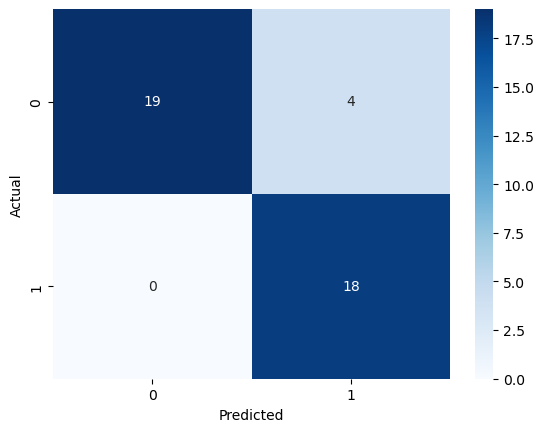

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
sample_email = ["Congratulations! You won a free iPhone. Click now!"]

sample_vector = vectorizer.transform(sample_email)
prediction = model.predict(sample_vector)

if prediction[0] == 1:
    print("Spam Email")
else:
    print("Not Spam Email")

Spam Email
